In [1]:
import numpy as np

def generate_cluster(center, num_samples, std_dev):
    cluster = np.random.randn(num_samples, len(center)) * std_dev + center
    return cluster

In [2]:
# Generate two clusters with different centers and standard deviations
n = 5 # dimensionality of each sample
center1 = np.random.randn(n) # center of first cluster
center2 = np.random.randn(n) # center of second cluster
num_samples = 100 # number of samples in each cluster
std_dev1 = 0.5 # standard deviation of first cluster
std_dev2 = 0.75 # standard deviation of second cluster

cluster1 = generate_cluster(center1, num_samples, std_dev1)
cluster2 = generate_cluster(center2, num_samples, std_dev2)

# Combine the two clusters into a single dataset
dataset = np.concatenate((cluster1, cluster2), axis=0)

In [3]:
dataset[:5]

array([[-0.9061505 , -0.3734357 ,  1.51582074,  0.52285964, -2.26776499],
       [-0.72093305, -0.59683325,  0.27617712,  1.56070672, -1.70481647],
       [ 0.04014889, -0.75781093,  1.40406292,  0.89759637, -1.53067971],
       [ 0.27743032, -1.07352774,  0.89145889,  1.09366044, -2.10484576],
       [ 0.65077555, -0.11507456,  0.33995649,  0.72106916, -1.63479802]])

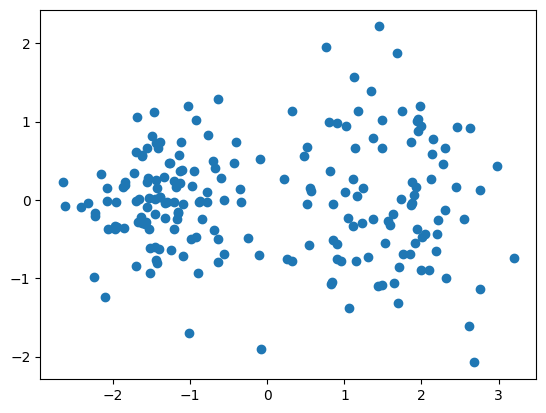

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
data_2d = pca.fit_transform(dataset)

# Plot the data
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.show()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(dataset)

KMeans(n_clusters=2, n_init=10)

In [6]:
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the cluster labels and centroids
print("Cluster labels:", labels)
print("Centroids:", centroids)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Centroids: [[ 0.35352229  1.40588451 -0.1633571  -0.52640489 -1.15549061]
 [-0.57185598 -0.65874184  1.05161553  0.72298664 -1.60796455]]


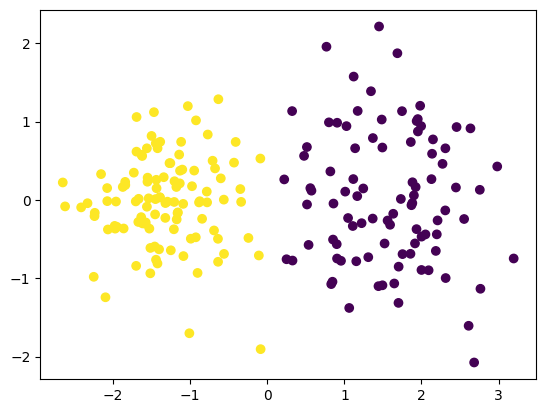

In [7]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
kmeans_pca = pca.fit_transform(dataset)

# Plot the data
plt.scatter(kmeans_pca[:, 0], kmeans_pca[:, 1], c=labels)
plt.show()

In [8]:
# Find the cluster centers for each of the two clusters
center1 = np.mean(cluster1, axis=0)
center2 = np.mean(cluster2, axis=0)

# Find the mean of the two cluster centers to get the central point
central_point = (center1 + center2) / 2
central_point

array([-0.14618197,  0.29098628,  0.49272812,  0.14826653, -1.39982654])

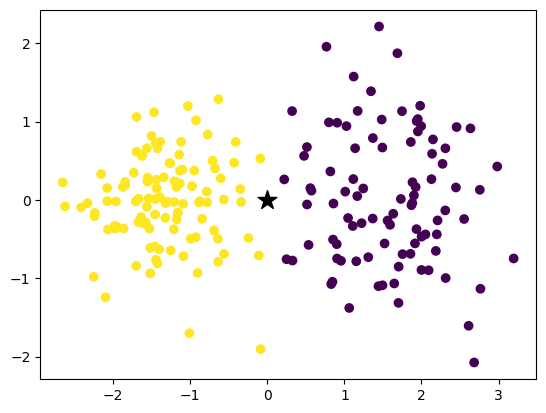

In [9]:
# Apply pca to the center point
central_point_pca = pca.transform(central_point.reshape(1, -1))
# Plot the data
plt.scatter(kmeans_pca[:, 0], kmeans_pca[:, 1], c=labels)

# Add a marker for the central point
plt.scatter(central_point_pca[0][0], central_point_pca[0][1], s=200, marker='*', color='k')

plt.show()